# Part 2C - Extracting Movie Reviews for NLP (WIP)

- 11/23/23
- Extract the reviews from TMDB for any movies from the TMDB API calls from Part 2A to prepare for Part 8 / Streamlit app.

## WARNING:
- Weird issue with API calls cell getting skipped over. Almost like its index is wrong in the raw ipynb?

In [74]:
import pandas as pd
import missingno
pd.set_option('display.max_columns',100)

In [2]:
import glob

# # Get all filepaths that match the pattern (*=wildcard)
tmdb_files = sorted(glob.glob("Data/final_tmdb_data*.csv.gz"))
tmdb_files

['Data/final_tmdb_data_2000.csv.gz',
 'Data/final_tmdb_data_2001.csv.gz',
 'Data/final_tmdb_data_2002.csv.gz',
 'Data/final_tmdb_data_2003.csv.gz',
 'Data/final_tmdb_data_2004.csv.gz',
 'Data/final_tmdb_data_2005.csv.gz',
 'Data/final_tmdb_data_2006.csv.gz',
 'Data/final_tmdb_data_2007.csv.gz',
 'Data/final_tmdb_data_2008.csv.gz',
 'Data/final_tmdb_data_2009.csv.gz',
 'Data/final_tmdb_data_2010.csv.gz',
 'Data/final_tmdb_data_2011.csv.gz',
 'Data/final_tmdb_data_2012.csv.gz',
 'Data/final_tmdb_data_2013.csv.gz',
 'Data/final_tmdb_data_2014.csv.gz',
 'Data/final_tmdb_data_2015.0.csv.gz',
 'Data/final_tmdb_data_2015.csv.gz',
 'Data/final_tmdb_data_2016.0.csv.gz',
 'Data/final_tmdb_data_2016.csv.gz',
 'Data/final_tmdb_data_2017.0.csv.gz',
 'Data/final_tmdb_data_2017.csv.gz',
 'Data/final_tmdb_data_2018.0.csv.gz',
 'Data/final_tmdb_data_2018.csv.gz',
 'Data/final_tmdb_data_2019.0.csv.gz',
 'Data/final_tmdb_data_2019.csv.gz',
 'Data/final_tmdb_data_2020.0.csv.gz',
 'Data/final_tmdb_data_202

In [3]:
# # Use read_csv in a list comprehension and combine with concat to load all files
df = pd.concat([pd.read_csv(f, lineterminator='\n') for f in tmdb_files] )
# df = pd.read_csv('Data/combined_tmdb_api_data.csv.gz', lineterminator="\n")
df

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,False,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127,tt0113026,en,The Fantasticks,Two rural teens sing and dance their way throu...,2.510,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,False,5.4,21,NaN
1,False,NaN,NaN,0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977,tt0113092,en,For the Cause,Earth is in a state of constant war and two co...,1.518,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,False,4.4,7,NaN
2,False,NaN,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869,tt0116391,hi,Gang,"After falling prey to underworld, four friends...",0.600,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,False,0.0,0,NaN
3,False,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843,tt0118694,cn,花樣年華,"Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...",14.944,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': None, 'name': 'Block...","[{'iso_3166_1': 'HK', 'name': 'Hong Kong'}]",2000-09-29,12854953,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,False,8.1,1879,PG
4,False,NaN,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511,tt0118852,en,Chinese Coffee,"When Harry Levine, an aging, unsuccessful Gree...",4.164,/s6yQFnJohmvdkbeHbx6fFOTpYwR.jpg,"[{'id': 67930, 'logo_path': None, 'name': 'Cha...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-02,0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,False,6.9,46,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3886,False,/aO9BxxjAFVy5yUIk0aJdCf5uCNO.jpg,NaN,20000,"[{'id': 27, 'name': 'Horror'}, {'id': 14, 'nam...",http://www.chapterxmovie.com,1187025,tt9881678,en,Chapter Ten,Decades after the gruesome murder of his paren...,7.448,/uyG1OTVvUJNDLdCpphZUMeCDXSt.jpg,"[{'id': 211313, 'logo_path': None, 'name': 'CS...","[{'iso_3166_1': 'US', 'name': 'United States o...",2023-11-07,0,98.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"One day, you will know true darkness.",Chapter X,False,3.0,1,NaN
3887,False,NaN,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,1186271,tt9884202,pa,Zindagi Zindabaad,"It is always been said that ""Addiction to Life...",1.274,/xL0DIfGkeytaEOfMfIOKLBcuGkw.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2023-10-27,0,0.0,"[{'english_name': 'Punjabi', 'iso_639_1': 'pa'...",Released,NaN,Zindagi Zindabaad,False,0.0,0,NaN
3888,False,NaN,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,1173411,tt9884388,en,The Mux,"Rex, a DJ, is convinced he can find a better '...",1.400,/kdUjn1iF52Hxfv5iicKVzI391fM.jpg,"[{'id': 207703, 'logo_path': None, 'name': 'Ob...",[],NaN,0,65.0,[],Released,NaN,The Mux,False,0.0,0,NaN
3889,False,NaN,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,1141136,tt9897230,ka,ღიმილიანი საქართველო,During its 2012 election campaign titled “Smil...,0.737,/vxv0hm6UYf8JBoLgNBbTkB

In [4]:
# df = pd.read_csv("Data/Combined_TMDB_API_results.csv.gz", index_col=0)
df = df.loc[df['imdb_id'] != "0"].reset_index(drop=True)
df = df.dropna(subset=['original_title','id'])
df['id']= df['id'].astype(int)
# df = pd.concat([pd.read_csv(f) for f in tmdb_files] )
df

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,False,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127,tt0113026,en,The Fantasticks,Two rural teens sing and dance their way throu...,2.510,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,False,5.4,21,NaN
1,False,NaN,NaN,0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977,tt0113092,en,For the Cause,Earth is in a state of constant war and two co...,1.518,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,False,4.4,7,NaN
2,False,NaN,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869,tt0116391,hi,Gang,"After falling prey to underworld, four friends...",0.600,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,False,0.0,0,NaN
3,False,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843,tt0118694,cn,花樣年華,"Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...",14.944,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': None, 'name': 'Block...","[{'iso_3166_1': 'HK', 'name': 'Hong Kong'}]",2000-09-29,12854953,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,False,8.1,1879,PG
4,False,NaN,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511,tt0118852,en,Chinese Coffee,"When Harry Levine, an aging, unsuccessful Gree...",4.164,/s6yQFnJohmvdkbeHbx6fFOTpYwR.jpg,"[{'id': 67930, 'logo_path': None, 'name': 'Cha...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-02,0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,False,6.9,46,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130697,False,/aO9BxxjAFVy5yUIk0aJdCf5uCNO.jpg,NaN,20000,"[{'id': 27, 'name': 'Horror'}, {'id': 14, 'nam...",http://www.chapterxmovie.com,1187025,tt9881678,en,Chapter Ten,Decades after the gruesome murder of his paren...,7.448,/uyG1OTVvUJNDLdCpphZUMeCDXSt.jpg,"[{'id': 211313, 'logo_path': None, 'name': 'CS...","[{'iso_3166_1': 'US', 'name': 'United States o...",2023-11-07,0,98.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"One day, you will know true darkness.",Chapter X,False,3.0,1,NaN
130698,False,NaN,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,1186271,tt9884202,pa,Zindagi Zindabaad,"It is always been said that ""Addiction to Life...",1.274,/xL0DIfGkeytaEOfMfIOKLBcuGkw.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2023-10-27,0,0.0,"[{'english_name': 'Punjabi', 'iso_639_1': 'pa'...",Released,NaN,Zindagi Zindabaad,False,0.0,0,NaN
130699,False,NaN,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,1173411,tt9884388,en,The Mux,"Rex, a DJ, is convinced he can find a better '...",1.400,/kdUjn1iF52Hxfv5iicKVzI391fM.jpg,"[{'id': 207703, 'logo_path': None, 'name': 'Ob...",[],NaN,0,65.0,[],Released,NaN,The Mux,False,0.0,0,NaN
130700,False,NaN,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,1141136,tt9897230,ka,ღიმილიანი საქართველო,During its 2012 election campaign titled “Smil...,0.737,/vxv0hm6UYf8JBo

In [5]:
df.duplicated(subset=["id",'imdb_id']).sum()

41236

In [6]:
df =  df.drop_duplicates(subset=['id','imdb_id'])
df = df.reset_index(drop=True)
df

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,False,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127,tt0113026,en,The Fantasticks,Two rural teens sing and dance their way throu...,2.510,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,False,5.4,21,NaN
1,False,NaN,NaN,0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977,tt0113092,en,For the Cause,Earth is in a state of constant war and two co...,1.518,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,False,4.4,7,NaN
2,False,NaN,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869,tt0116391,hi,Gang,"After falling prey to underworld, four friends...",0.600,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,False,0.0,0,NaN
3,False,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843,tt0118694,cn,花樣年華,"Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...",14.944,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': None, 'name': 'Block...","[{'iso_3166_1': 'HK', 'name': 'Hong Kong'}]",2000-09-29,12854953,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,False,8.1,1879,PG
4,False,NaN,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511,tt0118852,en,Chinese Coffee,"When Harry Levine, an aging, unsuccessful Gree...",4.164,/s6yQFnJohmvdkbeHbx6fFOTpYwR.jpg,"[{'id': 67930, 'logo_path': None, 'name': 'Cha...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-02,0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,False,6.9,46,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89461,False,/aO9BxxjAFVy5yUIk0aJdCf5uCNO.jpg,NaN,20000,"[{'id': 27, 'name': 'Horror'}, {'id': 14, 'nam...",http://www.chapterxmovie.com,1187025,tt9881678,en,Chapter Ten,Decades after the gruesome murder of his paren...,7.448,/uyG1OTVvUJNDLdCpphZUMeCDXSt.jpg,"[{'id': 211313, 'logo_path': None, 'name': 'CS...","[{'iso_3166_1': 'US', 'name': 'United States o...",2023-11-07,0,98.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"One day, you will know true darkness.",Chapter X,False,3.0,1,NaN
89462,False,NaN,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,1186271,tt9884202,pa,Zindagi Zindabaad,"It is always been said that ""Addiction to Life...",1.274,/xL0DIfGkeytaEOfMfIOKLBcuGkw.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2023-10-27,0,0.0,"[{'english_name': 'Punjabi', 'iso_639_1': 'pa'...",Released,NaN,Zindagi Zindabaad,False,0.0,0,NaN
89463,False,NaN,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,1173411,tt9884388,en,The Mux,"Rex, a DJ, is convinced he can find a better '...",1.400,/kdUjn1iF52Hxfv5iicKVzI391fM.jpg,"[{'id': 207703, 'logo_path': None, 'name': 'Ob...",[],NaN,0,65.0,[],Released,NaN,The Mux,False,0.0,0,NaN
89464,False,NaN,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,1141136,tt9897230,ka,ღიმილიანი საქართველო,During its 2012 election campaign titled “Smil...,0.737,/vxv0hm6UYf8JBoLgNB

In [7]:
filter_has_finances  = (df['budget'] >0 ) & (df['revenue']>9)
df[filter_has_finances]

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
3,False,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843,tt0118694,cn,花樣年華,"Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...",14.944,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': None, 'name': 'Block...","[{'iso_3166_1': 'HK', 'name': 'Hong Kong'}]",2000-09-29,12854953,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,False,8.100,1879,PG
11,False,/knok3mNReKqPTplnnqz7E4dd7mD.jpg,NaN,120000,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,19085,tt0120467,en,Vulgar,Vulgar is about a man who is a children's clow...,3.692,/aLdezroGbHDP0w0jOLwxXjgrgma.jpg,"[{'id': 102045, 'logo_path': None, 'name': 'Ch...","[{'iso_3166_1': 'US', 'name': 'United States o...",2002-04-26,14904,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone loves a clown... some more than others.,Vulgar,False,5.400,41,R
13,False,/t7aJ7hqsMLEoqBJk7yAXxcAVvcz.jpg,"{'id': 718551, 'name': 'Chicken Run Collection...",45000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",NaN,7443,tt0120630,en,Chicken Run,Having been hopelessly repressed and facing ev...,35.780,/8XgmIsbpVamdhwcNVsYzohFZTtT.jpg,"[{'id': 521, 'logo_path': '/kP7t6RwGz2AvvTkvnI...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2000-06-21,224834564,84.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,This ain't no chick flick. It's poultry in mot...,Chicken Run,False,6.700,4009,G
16,False,/cXXxi0j9sXFt7LbeajuFoKFqWMu.jpg,NaN,8000000,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,318,tt0120753,en,The Million Dollar Hotel,The Million Dollar Hotel starts with a jump fr...,6.431,/7AjzGYybwfndxnpApKXahQiq2Zy.jpg,"[{'id': 1490, 'logo_path': None, 'name': 'Kint...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-02-09,105983,122.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone has something to hide.,The Million Dollar Hotel,False,5.900,247,R
17,False,/8XaohdSqoBEWHhW40q2VTdMBrV0.jpg,"{'id': 87359, 'name': 'Mission: Impossible Col...",125000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",NaN,955,tt0120755,en,Mission: Impossible II,With computer genius Luther Stickell at his si...,22.658,/2njB2A85Ni7bRR7vIOrfv6TBPeC.jpg,"[{'id': 4, 'logo_path': '/gz66EfNoYPqHTYI4q9UE...","[{'iso_3166_1': 'AU', 'name': 'Australia'}, {'...",2000-05-24,546388105,123.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Expect the impossible again.,Mission: Impossible II,False,6.100,5297,PG-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89415,False,/qNmLEOGZy37vKAPqcTuZ47uCOS9.jpg,NaN,30000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",https://www.itsmemargaret.movie,555285,tt9185206,en,"Are You There God? It's Me, Margaret.",When her family moves from New York City to Ne...,47.950,/yb6UB4WC3znlwU0L4AqMnjR9G9S.jpg,"[{'id': 18, 'logo_path': '/uqhagSwM7NAkQWVCQhK...","[{'iso_3166_1': 'US', 'name': 'United States o...",2023-03-29,21826840,107.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Discovering who you are is a journey that last...,"Are You There God? It's Me, Margaret.",False,7.324,162,PG-13
89419,False,/5mzr6JZbrqnqD8rCEvPhuCE5Fw2.jpg,"{'id': 742536, 'name': 'The Meg Collection', '...",129000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",https://www.themeg.movie,615656,tt9224104,en,Meg 2: The Trench,An exploratory dive into the deepest depths of...,460.025,/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg,"[{'id': 56242, 'logo_path': '/1YORRYmg7hgYIgoJ...","[{'iso_

In [8]:
# import os

# nlp_folder = "Data-NLP/"
# os.makedirs(nlp_folder, exist_ok=True)
# fname_json = nlp_folder +'tmdb-movies.json'
# df.to_json(fname_json)
# # fname = nlp_folder+'tmdb-movies.csv'
# # df.to_csv(fname, index=True)

In [9]:
# df = pd.read_json(fname_json)
# df

In [10]:
# df = pd.read_csv(fname, lineterminator='\n')
# df

In [11]:
df['id']

0          62127
1         110977
2         442869
3            843
4          49511
          ...   
89461    1187025
89462    1186271
89463    1173411
89464    1141136
89465    1186957
Name: id, Length: 89466, dtype: int64

## Extracting Reviews

In [12]:
len(df)

89466

In [13]:
filter_has_finances.sum()

5651

In [14]:
# keeping only movies with financial data
df  = df[filter_has_finances]
df

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
3,False,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843,tt0118694,cn,花樣年華,"Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...",14.944,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': None, 'name': 'Block...","[{'iso_3166_1': 'HK', 'name': 'Hong Kong'}]",2000-09-29,12854953,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,False,8.100,1879,PG
11,False,/knok3mNReKqPTplnnqz7E4dd7mD.jpg,NaN,120000,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,19085,tt0120467,en,Vulgar,Vulgar is about a man who is a children's clow...,3.692,/aLdezroGbHDP0w0jOLwxXjgrgma.jpg,"[{'id': 102045, 'logo_path': None, 'name': 'Ch...","[{'iso_3166_1': 'US', 'name': 'United States o...",2002-04-26,14904,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone loves a clown... some more than others.,Vulgar,False,5.400,41,R
13,False,/t7aJ7hqsMLEoqBJk7yAXxcAVvcz.jpg,"{'id': 718551, 'name': 'Chicken Run Collection...",45000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",NaN,7443,tt0120630,en,Chicken Run,Having been hopelessly repressed and facing ev...,35.780,/8XgmIsbpVamdhwcNVsYzohFZTtT.jpg,"[{'id': 521, 'logo_path': '/kP7t6RwGz2AvvTkvnI...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2000-06-21,224834564,84.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,This ain't no chick flick. It's poultry in mot...,Chicken Run,False,6.700,4009,G
16,False,/cXXxi0j9sXFt7LbeajuFoKFqWMu.jpg,NaN,8000000,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,318,tt0120753,en,The Million Dollar Hotel,The Million Dollar Hotel starts with a jump fr...,6.431,/7AjzGYybwfndxnpApKXahQiq2Zy.jpg,"[{'id': 1490, 'logo_path': None, 'name': 'Kint...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-02-09,105983,122.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone has something to hide.,The Million Dollar Hotel,False,5.900,247,R
17,False,/8XaohdSqoBEWHhW40q2VTdMBrV0.jpg,"{'id': 87359, 'name': 'Mission: Impossible Col...",125000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",NaN,955,tt0120755,en,Mission: Impossible II,With computer genius Luther Stickell at his si...,22.658,/2njB2A85Ni7bRR7vIOrfv6TBPeC.jpg,"[{'id': 4, 'logo_path': '/gz66EfNoYPqHTYI4q9UE...","[{'iso_3166_1': 'AU', 'name': 'Australia'}, {'...",2000-05-24,546388105,123.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Expect the impossible again.,Mission: Impossible II,False,6.100,5297,PG-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89415,False,/qNmLEOGZy37vKAPqcTuZ47uCOS9.jpg,NaN,30000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",https://www.itsmemargaret.movie,555285,tt9185206,en,"Are You There God? It's Me, Margaret.",When her family moves from New York City to Ne...,47.950,/yb6UB4WC3znlwU0L4AqMnjR9G9S.jpg,"[{'id': 18, 'logo_path': '/uqhagSwM7NAkQWVCQhK...","[{'iso_3166_1': 'US', 'name': 'United States o...",2023-03-29,21826840,107.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Discovering who you are is a journey that last...,"Are You There God? It's Me, Margaret.",False,7.324,162,PG-13
89419,False,/5mzr6JZbrqnqD8rCEvPhuCE5Fw2.jpg,"{'id': 742536, 'name': 'The Meg Collection', '...",129000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",https://www.themeg.movie,615656,tt9224104,en,Meg 2: The Trench,An exploratory dive into the deepest depths of...,460.025,/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg,"[{'id': 56242, 'logo_path': '/1YORRYmg7hgYIgoJ...","[{'iso_

In [15]:
df_ids = df[['title','imdb_id','id']]
# df_ids = df_ids.drop_duplicates()
df_ids = df_ids.set_index('title')
df = df.set_index('imdb_id')
df_ids

,imdb_id,id
title,,
In the Mood for Love,tt0118694,843
Vulgar,tt0120467,19085
Chicken Run,tt0120630,7443
The Million Dollar Hotel,tt0120753,318
Mission: Impossible II,tt0120755,955
...,...,...
"Are You There God? It's Me, Margaret.",tt9185206,555285
Meg 2: The Trench,tt9224104,615656
Spider-Man: Across the Spider-Verse,tt9362722,569094


In [16]:
# df_ids.duplicated(subset=['imdb_id']).sum()

In [17]:
df_ids.loc['The Avengers']

imdb_id    tt0848228
id             24428
Name: The Avengers, dtype: object

In [18]:
# df_ids.to_dict(orient='tight')

In [19]:
# movie_id_lookup =.to_dict(orient='index')
# movie_id_lookup

In [20]:
# df_ids.duplicated(subset=['title']).sum()

In [21]:
# df_ids[df_ids.duplicated(subset=['title'], keep=False)].sort_values('title')

In [22]:
# df_ids['id'].duplicated().sum()

In [23]:
# df_ids.index.duplicated().sum()

In [24]:
# id_dict = df_ids.to_dict(orient='index')
# id_dict

In [25]:
def get_movie_with_rating(movie_id):
    # Get the movie object for the current id
    movie = tmdb.Movies(movie_id)
    
    # save the .info .releases dictionaries
    movie_info = movie.info()
    releases = movie.releases()
    
    # Loop through countries in releases
    for c in releases['countries']:
        # if the country abbreviation==US
        if c['iso_3166_1' ] =='US':
            ## save a "certification" key in the info dict with the certification
            movie_info['certification'] = c['certification']
    return movie_info


def write_json(new_data, filename, overwrite=False, skip=False): 
    """Appends a list of records (new_data) to a json file (filename). 
    Adapted from: https://www.geeksforgeeks.org/append-to-json-file-using-python/"""  
    
    if (overwrite==True) & (skip==True):
        raise Exception("Only 1 of overwrite or skip may be set to True")

    # find if file exists
    exists = os.path.exists(filename)

    if exists==False:
        mode = 'w'
    else:
        if overwrite==True:
            # exists=False
            mode = 'w'
            
        elif skip == True:
            return 
            
        else:
            mode = 'r+'

    
    with open(filename,mode) as file:

        if mode == 'r+':
            # First we load existing data into a dict.
            file_data = json.load(file)
            
            ## Choose extend or append
            if (type(new_data) == list) & (type(file_data) == list):
                file_data.extend(new_data)
            else:
                 file_data.append(new_data)
            # Sets file's current position at offset.
            file.seek(0)
        else:
            file_data = new_data
            
        # convert back to json.
        json.dump(file_data, file)
        return


In [26]:
### Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, json, time
from tqdm.notebook import tqdm_notebook

In [27]:
import json
with open('/Users/codingdojo/.secret/tmdb_api.json', 'r') as f:
    login = json.load(f)
## Display the keys of the loaded dict
login.keys()

dict_keys(['api-key', 'api-token'])

In [28]:
!pip install -U tmdbsimple

In [29]:
import tmdbsimple as tmdb
tmdb.API_KEY =  login['api-key']
# tmdb.API
# tmdb.API_KEY = login['api-key']+'.' + login['api-read-access-token']
tmdb.REQUESTS_TIMEOUT = 5
# tmdb.API_KEY = login['api-read-access-token']

In [30]:
df.loc[df['title'].str.contains("Avenger")]

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
imdb_id,,,,,,,,,,,,,,,,,,,,,,,,,
tt0458339,False,/yFuKvT4Vm3sKHdFY4eG6I4ldAnn.jpg,"{'id': 131295, 'name': 'Captain America Collec...",140000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://captainamerica.marvel.com/,1771,en,Captain America: The First Avenger,"During World War II, Steve Rogers is a sickly ...",105.404,/vSNxAJTlD0r02V9sPYpOjqDZXUK.jpg,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2011-07-22,370569774,124.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,When patriots become heroes,Captain America: The First Avenger,False,7.000,18581,PG-13
tt0848228,False,/nNmJRkg8wWnRmzQDe2FwKbPIsJV.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.marvel.com/movies/the-avengers,24428,en,The Avengers,When an unexpected enemy emerges and threatens...,268.784,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-04-25,1518815515,143.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some assembly required.,The Avengers,False,7.700,26914,PG-13
tt2395427,False,/6YwkGolwdOMNpbTOmLjoehlVWs5.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",365000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://marvel.com/movies/movie/193/avengers_ag...,99861,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,108.405,/4ssDuvEDkSArWEdyBl2X5EHvYKU.jpg,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-04-22,1405403694,141.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,A new age has come.,Avengers: Age of Ultron,False,7.274,21916,PG-13
tt4154756,False,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",https://www.marvel.com/movies/avengers-infinit...,299536,en,Avengers: Infinity War,As the Avengers and their allies have continue...,229.122,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2018-04-25,2052415039,149.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,An entire universe. Once and for all.,Avengers: Infinity War,False,8.253,27981,PG-13
tt4154796,False,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",356000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",https://www.marvel.com/movies/avengers-endgame,299534,en,Avengers: Endgame,After the devastating events of Avengers: Infi...,155.820,/or06FN3Dka5tukK1e9sl16pB3iy.jpg,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2019-04-24,2800000000,181.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Avenge the fallen.,Avengers: Endgame,False,8.261,24086,PG-13


```
imdb_id    tt0848228
id             24428
```

In [31]:
imdb_id = 'tt0848228'
movie_id = 24428

df.loc[imdb_id]

adult                                                                False
backdrop_path                             /nNmJRkg8wWnRmzQDe2FwKbPIsJV.jpg
belongs_to_collection    {'id': 86311, 'name': 'The Avengers Collection...
budget                                                           220000000
genres                   [{'id': 878, 'name': 'Science Fiction'}, {'id'...
homepage                        https://www.marvel.com/movies/the-avengers
id                                                                   24428
original_language                                                       en
original_title                                                The Avengers
overview                 When an unexpected enemy emerges and threatens...
popularity                                                         268.784
poster_path                                /RYMX2wcKCBAr24UyPD7xwmjaTn.jpg
production_companies     [{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...
production_countries     

In [32]:
# # Barbie
# movie_id = 346698

In [33]:

res = tmdb.Movies(movie_id)
res.info()

{'adult': False,
 'backdrop_path': '/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg',
 'belongs_to_collection': {'id': 86311,
  'name': 'The Avengers Collection',
  'poster_path': '/yFSIUVTCvgYrpalUktulvk3Gi5Y.jpg',
  'backdrop_path': '/zuW6fOiusv4X9nnW3paHGfXcSll.jpg'},
 'budget': 220000000,
 'genres': [{'id': 878, 'name': 'Science Fiction'},
  {'id': 28, 'name': 'Action'},
  {'id': 12, 'name': 'Adventure'}],
 'homepage': 'https://www.marvel.com/movies/the-avengers',
 'id': 24428,
 'imdb_id': 'tt0848228',
 'original_language': 'en',
 'original_title': 'The Avengers',
 'overview': 'When an unexpected enemy emerges and threatens global safety and security, Nick Fury, director of the international peacekeeping agency known as S.H.I.E.L.D., finds himself in need of a team to pull the world back from the brink of disaster. Spanning the globe, a daring recruitment effort begins!',
 'popularity': 179.812,
 'poster_path': '/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg',
 'production_companies': [{'id': 420,
   'logo_path

## Road Block: Issue with Getting the avengers reviews

In [34]:
import requests

def request_reviews(movie_id,page=1):
    # source: https://developer.themoviedb.org/reference/movie-reviews
    url = f"https://api.themoviedb.org/3/movie/{movie_id}/reviews?language=en-US&page={page}"

    headers = {
        "accept": "application/json",
        "Authorization": f"Bearer {login['api-token']}"
    }
    response = requests.get(url, headers=headers)
    try:
        return response.json()
    except:
        print("[!] Error returning response.json()")
        return response 
    # print(response.text)

def get_reviews(movie_id,start_page=1):
    
    reviews_json = request_reviews(movie_id, page=start_page)
    try:
        n_pages = reviews_json['total_pages']
    except:
        n_pages=1
        
    all_responses = reviews_json['results']
    
    for page in range(2, n_pages+1):
        reviews_json = request_reviews(movie_id, page=page)
        all_responses.extend(reviews_json['results'])

    ## Add movie id to all results
    final_results = []
    for review in all_responses:
        
        review_results = {
                    "movie_id": movie_id, #review["movie_id"],
                    "review_id": review["id"],
                    "rating": review["author_details"]["rating"],
                    "review_text": review["content"],
                    "created_at": review['created_at'],
                    # 'updated_at':review['updated_at']
        }
    
        final_results.append(review_results)
        
    return final_results

In [35]:
reviews_json = get_reviews(movie_id)
len(reviews_json)

41

In [36]:
pd.DataFrame(reviews_json)

,movie_id,review_id,author_rating,review_text,created_at
0,24428,4fce8f8819c29523880000de,8.0,With a movie like this you wonder how all of t...,2012-06-05T23:00:24.000Z
1,24428,59f29e47c3a3687126003ccd,9.0,**A long format review from 2012**\r\n\r\nMy n...,2017-10-27T02:47:35.267Z
2,24428,5a657f809251410b2d030491,NaN,"After the recent disappointments from Marvel, ...",2018-01-22T06:06:56.333Z
3,24428,5c8426f992514127631f9b36,8.0,One of the few movies to actually make me feel...,2019-03-09T20:50:01.703Z
4,24428,5cad1876c3a36812a018fc9c,8.5,I give this 10 Stars based on it being not onl...,2019-04-09T22:11:02.850Z
5,24428,5d46cf540f2fbd7864efbe30,9.0,"Everything that's happening, the things that a...",2019-08-04T12:28:04.980Z
6,24428,5dc32f2f5aadc4001520e0dd,NaN,The Avengers is a dream movie come true for su...,2019-11-06T20:38:07.253Z
7,24428,5dc389f37d2bc100133d06df,NaN,Definitely the greatest superhero movie of all...,2019-11-07T03:05:23.344Z
8,24428,5dc3930999259c00157aa7cb,NaN,I found it creative of Marvel to introduce eac...,2019-11-07T03:44:09.147Z
9,24428,5dc3993d470ead00138cf1ec,NaN,Perfect casting! You can really see and feel t...,2019-11-07T04:10:37.105Z


In [37]:
# test_review = reviews_json[0]
# test_review.keys()

In [38]:
# test_review['id']

In [39]:
# test_review['movie_id']

In [40]:
# test_review['author_details']

In [41]:
# test_review['author_details']['rating']

In [42]:
# test_review['content']

In [43]:
# test_review['id','movie_id']

In [44]:
# final_results = {
#     "movie_id": test_review["movie_id"],
#     "review_id": test_review["id"],
#     "rating": test_review["author_details"]["rating"],
#     "review_text": test_review["content"],
#     "created_at": test_review['created_at'],
#     'updated_at':test_review['updated_at']
# }
# final_results

In [45]:
# reviews_json[1]

In [46]:
# reviews_json['page']

In [47]:
# reviews_json['total_pages']

In [48]:
# len(reviews_json['results'])

In [49]:
# response.json()

In [50]:
# reviews = tmdb.Reviews(movie_id)
# reviews.info()

In [51]:
df['id']

imdb_id
tt0118694       843
tt0120467     19085
tt0120630      7443
tt0120753       318
tt0120755       955
              ...  
tt9185206    555285
tt9224104    615656
tt9362722    569094
tt9362930    565770
tt9603212    575264
Name: id, Length: 5651, dtype: int64

In [52]:
# tmdb.Reviews()

In [53]:
def get_movie_with_rating(movie_id):
    # Get the movie object for the current id
    movie = tmdb.Movies(movie_id)
    
    # save the .info .releases dictionaries
    movie_info = movie.info()
    releases = movie.releases()
    
    # Loop through countries in releases
    for c in releases['countries']:
        # if the country abbreviation==US
        if c['iso_3166_1' ] =='US':
            ## save a "certification" key in the info dict with the certification
            movie_info['certification'] = c['certification']
    return movie_info


In [54]:
# df

In [55]:
# SET VARS FOR LOOP
FOLDER = "Data-NLP/"
os.makedirs(FOLDER,exist_ok=True)

# Save movie data for just movies with financial data
fname_data = FOLDER+"tmdb-movie-info.csv.gz"
df.to_csv(fname_data, compression='gzip')


# Control saving method
SAVE_TO_DISK_FIRST = True

In [56]:
pd.read_csv(fname_data)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0118694,False,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843,cn,花樣年華,"Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...",14.944,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': None, 'name': 'Block...","[{'iso_3166_1': 'HK', 'name': 'Hong Kong'}]",2000-09-29,12854953,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,False,8.100,1879,PG
1,tt0120467,False,/knok3mNReKqPTplnnqz7E4dd7mD.jpg,NaN,120000,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,19085,en,Vulgar,Vulgar is about a man who is a children's clow...,3.692,/aLdezroGbHDP0w0jOLwxXjgrgma.jpg,"[{'id': 102045, 'logo_path': None, 'name': 'Ch...","[{'iso_3166_1': 'US', 'name': 'United States o...",2002-04-26,14904,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone loves a clown... some more than others.,Vulgar,False,5.400,41,R
2,tt0120630,False,/t7aJ7hqsMLEoqBJk7yAXxcAVvcz.jpg,"{'id': 718551, 'name': 'Chicken Run Collection...",45000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",NaN,7443,en,Chicken Run,Having been hopelessly repressed and facing ev...,35.780,/8XgmIsbpVamdhwcNVsYzohFZTtT.jpg,"[{'id': 521, 'logo_path': '/kP7t6RwGz2AvvTkvnI...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2000-06-21,224834564,84.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,This ain't no chick flick. It's poultry in mot...,Chicken Run,False,6.700,4009,G
3,tt0120753,False,/cXXxi0j9sXFt7LbeajuFoKFqWMu.jpg,NaN,8000000,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,318,en,The Million Dollar Hotel,The Million Dollar Hotel starts with a jump fr...,6.431,/7AjzGYybwfndxnpApKXahQiq2Zy.jpg,"[{'id': 1490, 'logo_path': None, 'name': 'Kint...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-02-09,105983,122.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone has something to hide.,The Million Dollar Hotel,False,5.900,247,R
4,tt0120755,False,/8XaohdSqoBEWHhW40q2VTdMBrV0.jpg,"{'id': 87359, 'name': 'Mission: Impossible Col...",125000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",NaN,955,en,Mission: Impossible II,With computer genius Luther Stickell at his si...,22.658,/2njB2A85Ni7bRR7vIOrfv6TBPeC.jpg,"[{'id': 4, 'logo_path': '/gz66EfNoYPqHTYI4q9UE...","[{'iso_3166_1': 'AU', 'name': 'Australia'}, {'...",2000-05-24,546388105,123.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Expect the impossible again.,Mission: Impossible II,False,6.100,5297,PG-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5646,tt9185206,False,/qNmLEOGZy37vKAPqcTuZ47uCOS9.jpg,NaN,30000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",https://www.itsmemargaret.movie,555285,en,"Are You There God? It's Me, Margaret.",When her family moves from New York City to Ne...,47.950,/yb6UB4WC3znlwU0L4AqMnjR9G9S.jpg,"[{'id': 18, 'logo_path': '/uqhagSwM7NAkQWVCQhK...","[{'iso_3166_1': 'US', 'name': 'United States o...",2023-03-29,21826840,107.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Discovering who you are is a journey that last...,"Are You There God? It's Me, Margaret.",False,7.324,162,PG-13
5647,tt9224104,False,/5mzr6JZbrqnqD8rCEvPhuCE5Fw2.jpg,"{'id': 742536, 'name': 'The Meg Collection', '...",129000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",https://www.themeg.movie,615656,en,Meg 2: The Trench,An exploratory dive into the deepest depths of...,460.025,/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg,"[{'id': 56242, 'logo_path': '/1YORRYmg7hgYIgoJ...","[{'iso_3166_1

## ✅ To Do:
- [ ] Add filenames to tmdb movie data df

In [57]:
import time

# OVERWRITE = False
SKIP_IF_EXISTS = False

# saving movie ids to list
movie_ids = df['id'].copy()#.to_list()

movie_id_filenames = {}
movie_files_with_reviews = []
movie_files_no_reviews = []
movie_files_skipped = []

#Get index and movie id from list
# INNER Loop
for movie_id in tqdm_notebook(movie_ids):
    try:
        #Defining the JSON file to store results for year
        JSON_FILE = f'{FOLDER}tmdb_reviews_{movie_id}.json'
        
        if os.path.exists(JSON_FILE) == True:
            if SKIP_IF_EXISTS==True:
                movie_files_skipped.append({'movie_id':movie_id,
                                           'filename':JSON_FILE})
                continue
                
        # Get reviews from API
        reviews_json = get_reviews(movie_id)

        # If no reviews, make a list of a single dict with movie_id
        if len(reviews_json) == 0:
            movie_files_no_reviews.append({'movie_id':movie_id, 
                                          'filename':JSON_FILE})
            reviews_json = [{'movie_id':movie_id}]
        else:
            movie_files_with_reviews.append({'movie_id':movie_id, 
                                          'filename':JSON_FILE})
        write_json(reviews_json, JSON_FILE, overwrite=False, skip=False)
        movie_id_filenames[movie_id] = JSON_FILE
        time.sleep(.01)
        
    except Exception as e:
        display(e)
        

  0%|          | 0/5651 [00:00<?, ?it/s]

KeyError('results')

KeyError('results')

In [58]:
len(movie_id_filenames)

5649

In [59]:
# type(mov)

In [60]:
len(movie_files_no_reviews)

2690

In [61]:
len(movie_files_with_reviews)

2959

In [62]:
## fixing m=

In [75]:
# raise Exception("decide which variable to use ffor filenames below")

#### TO DO: Decide if tracking empty files in df

In [64]:
movies_with_files_df = pd.DataFrame(movie_files_with_reviews)
movies_with_files_df

,movie_id,filename
0,843,Data-NLP/tmdb_reviews_843.json
1,7443,Data-NLP/tmdb_reviews_7443.json
2,955,Data-NLP/tmdb_reviews_955.json
3,36657,Data-NLP/tmdb_reviews_36657.json
4,11688,Data-NLP/tmdb_reviews_11688.json
...,...,...
2954,555285,Data-NLP/tmdb_reviews_555285.json
2955,615656,Data-NLP/tmdb_reviews_615656.json
2956,569094,Data-NLP/tmdb_reviews_569094.json
2957,565770,Data-NLP/tmdb_reviews_565770.json


## Adding Review Filenames to Main Df

In [67]:
# movies_with_files_df.duplicated(subset=['movie_id']).sum()

In [68]:
# Make file_map dict for addingnfilesnames to df
# FILE_MAP = movie_files_with_reviews #movie_id_filenames
FILE_MAP = dict(zip(movies_with_files_df['movie_id'],movies_with_files_df['filename']))

In [69]:
## Testing files to make sure theres data
FILE_MAP[800158]

'Data-NLP/tmdb_reviews_800158.json'

In [70]:
pd.read_json(FILE_MAP[800158])

,movie_id,review_id,author_rating,review_text,created_at
0,800158,64f4c6087d41aa00e18a5f2a,6,FULL SPOILER-FREE REVIEW @ https://fandomwire....,2023-09-03 17:44:40.492000+00:00
1,800158,6542527413654500ae469ae9,6,"Does anyone remember Baz Luhrmann's song ""Suns...",2023-11-01 13:28:20.797000+00:00
2,800158,655158d825b9550100953070,6,"The Killer presents a stylish front, intellige...",2023-11-12 22:59:36.597000+00:00
3,800158,655419e20816c700fd2f7156,8,Raw and ruthless - The Killer by David Fincher...,2023-11-15 01:07:46.633000+00:00
4,800158,65578047ea84c7109228c166,6,A tad bit underwhelming follows an assassin wh...,2023-11-17 15:01:27.970000+00:00
5,800158,64f4c6087d41aa00e18a5f2a,6,FULL SPOILER-FREE REVIEW @ https://fandomwire....,2023-09-03 17:44:40.492000+00:00
6,800158,6542527413654500ae469ae9,6,"Does anyone remember Baz Luhrmann's song ""Suns...",2023-11-01 13:28:20.797000+00:00
7,800158,655158d825b9550100953070,6,"The Killer presents a stylish front, intellige...",2023-11-12 22:59:36.597000+00:00
8,800158,655419e20816c700fd2f7156,8,Raw and ruthless - The Killer by David Fincher...,2023-11-15 01:07:46.633000+00:00
9,800158,65578047ea84c7109228c166,6,A tad bit underwhelming follows an assassin wh...,2023-11-17 15:01:27.970000+00:00


In [71]:
len(FILE_MAP)

2959

In [73]:
df['reviews_file'] = df['id'].map(FILE_MAP)
df.head()

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,reviews_file
imdb_id,,,,,,,,,,,,,,,,,,,,,,,,,,
tt0118694,False,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843,cn,花樣年華,"Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...",14.944,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': None, 'name': 'Block...","[{'iso_3166_1': 'HK', 'name': 'Hong Kong'}]",2000-09-29,12854953,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,False,8.1,1879,PG,Data-NLP/tmdb_reviews_843.json
tt0120467,False,/knok3mNReKqPTplnnqz7E4dd7mD.jpg,NaN,120000,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,19085,en,Vulgar,Vulgar is about a man who is a children's clow...,3.692,/aLdezroGbHDP0w0jOLwxXjgrgma.jpg,"[{'id': 102045, 'logo_path': None, 'name': 'Ch...","[{'iso_3166_1': 'US', 'name': 'United States o...",2002-04-26,14904,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone loves a clown... some more than others.,Vulgar,False,5.4,41,R,NaN
tt0120630,False,/t7aJ7hqsMLEoqBJk7yAXxcAVvcz.jpg,"{'id': 718551, 'name': 'Chicken Run Collection...",45000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",NaN,7443,en,Chicken Run,Having been hopelessly repressed and facing ev...,35.780,/8XgmIsbpVamdhwcNVsYzohFZTtT.jpg,"[{'id': 521, 'logo_path': '/kP7t6RwGz2AvvTkvnI...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2000-06-21,224834564,84.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,This ain't no chick flick. It's poultry in mot...,Chicken Run,False,6.7,4009,G,Data-NLP/tmdb_reviews_7443.json
tt0120753,False,/cXXxi0j9sXFt7LbeajuFoKFqWMu.jpg,NaN,8000000,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,318,en,The Million Dollar Hotel,The Million Dollar Hotel starts with a jump fr...,6.431,/7AjzGYybwfndxnpApKXahQiq2Zy.jpg,"[{'id': 1490, 'logo_path': None, 'name': 'Kint...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-02-09,105983,122.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone has something to hide.,The Million Dollar Hotel,False,5.9,247,R,NaN
tt0120755,False,/8XaohdSqoBEWHhW40q2VTdMBrV0.jpg,"{'id': 87359, 'name': 'Mission: Impossible Col...",125000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",NaN,955,en,Mission: Impossible II,With computer genius Luther Stickell at his si...,22.658,/2njB2A85Ni7bRR7vIOrfv6TBPeC.jpg,"[{'id': 4, 'logo_path': '/gz66EfNoYPqHTYI4q9UE...","[{'iso_3166_1': 'AU', 'name': 'Australia'}, {'...",2000-05-24,546388105,123.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Expect the impossible again.,Mission: Impossible II,False,6.1,5297,PG-13,Data-NLP/tmdb_reviews_955.json


<Axes: >

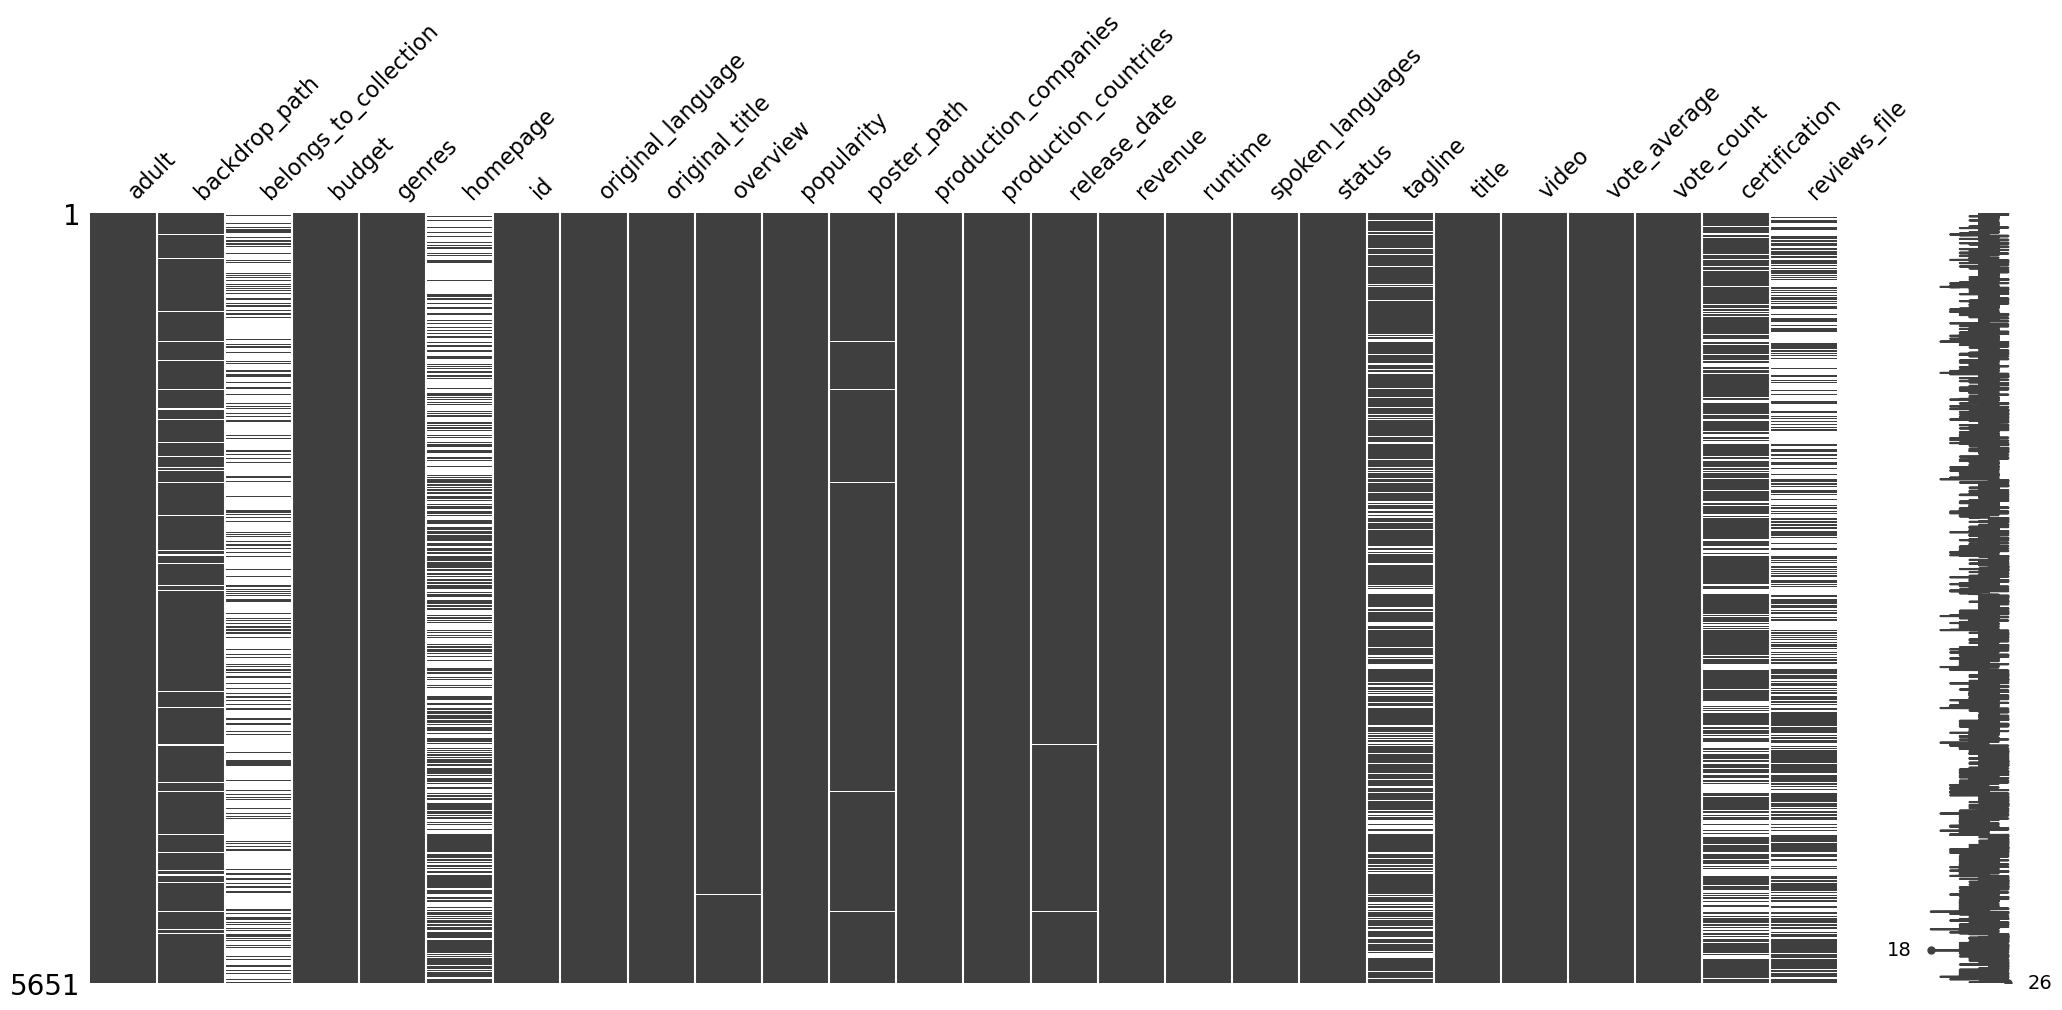

In [76]:
missingno.matrix(df)

In [78]:
# Save movie data for just movies with financial data
fname_data = FOLDER+"tmdb-movie-info.csv.gz"
df.to_csv(fname_data, compression='gzip', index=True)

In [79]:
pd.read_csv(fname_data)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,reviews_file
0,tt0118694,False,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843,cn,花樣年華,"Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...",14.944,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': None, 'name': 'Block...","[{'iso_3166_1': 'HK', 'name': 'Hong Kong'}]",2000-09-29,12854953,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,False,8.100,1879,PG,Data-NLP/tmdb_reviews_843.json
1,tt0120467,False,/knok3mNReKqPTplnnqz7E4dd7mD.jpg,NaN,120000,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,19085,en,Vulgar,Vulgar is about a man who is a children's clow...,3.692,/aLdezroGbHDP0w0jOLwxXjgrgma.jpg,"[{'id': 102045, 'logo_path': None, 'name': 'Ch...","[{'iso_3166_1': 'US', 'name': 'United States o...",2002-04-26,14904,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone loves a clown... some more than others.,Vulgar,False,5.400,41,R,NaN
2,tt0120630,False,/t7aJ7hqsMLEoqBJk7yAXxcAVvcz.jpg,"{'id': 718551, 'name': 'Chicken Run Collection...",45000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",NaN,7443,en,Chicken Run,Having been hopelessly repressed and facing ev...,35.780,/8XgmIsbpVamdhwcNVsYzohFZTtT.jpg,"[{'id': 521, 'logo_path': '/kP7t6RwGz2AvvTkvnI...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2000-06-21,224834564,84.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,This ain't no chick flick. It's poultry in mot...,Chicken Run,False,6.700,4009,G,Data-NLP/tmdb_reviews_7443.json
3,tt0120753,False,/cXXxi0j9sXFt7LbeajuFoKFqWMu.jpg,NaN,8000000,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,318,en,The Million Dollar Hotel,The Million Dollar Hotel starts with a jump fr...,6.431,/7AjzGYybwfndxnpApKXahQiq2Zy.jpg,"[{'id': 1490, 'logo_path': None, 'name': 'Kint...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-02-09,105983,122.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone has something to hide.,The Million Dollar Hotel,False,5.900,247,R,NaN
4,tt0120755,False,/8XaohdSqoBEWHhW40q2VTdMBrV0.jpg,"{'id': 87359, 'name': 'Mission: Impossible Col...",125000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",NaN,955,en,Mission: Impossible II,With computer genius Luther Stickell at his si...,22.658,/2njB2A85Ni7bRR7vIOrfv6TBPeC.jpg,"[{'id': 4, 'logo_path': '/gz66EfNoYPqHTYI4q9UE...","[{'iso_3166_1': 'AU', 'name': 'Australia'}, {'...",2000-05-24,546388105,123.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Expect the impossible again.,Mission: Impossible II,False,6.100,5297,PG-13,Data-NLP/tmdb_reviews_955.json
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5646,tt9185206,False,/qNmLEOGZy37vKAPqcTuZ47uCOS9.jpg,NaN,30000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",https://www.itsmemargaret.movie,555285,en,"Are You There God? It's Me, Margaret.",When her family moves from New York City to Ne...,47.950,/yb6UB4WC3znlwU0L4AqMnjR9G9S.jpg,"[{'id': 18, 'logo_path': '/uqhagSwM7NAkQWVCQhK...","[{'iso_3166_1': 'US', 'name': 'United States o...",2023-03-29,21826840,107.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Discovering who you are is a journey that last...,"Are You There God? It's Me, Margaret.",False,7.324,162,PG-13,Data-NLP/tmdb_reviews_555285.json
5647,tt9224104,False,/5mzr6JZbrqnqD8rCEvPhuCE5Fw2.jpg,"{'id': 742536, 'name': 'The Meg Collection', '...",129000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",https://www.themeg.movie,615656,en,Meg 2: The Trench,An e

## Troubleshooting Joining Reviews/Adding Filenames

In [82]:
reviews_files_df = pd.DataFrame(movie_files_with_reviews)
reviews_files_df

,movie_id,filename
0,843,Data-NLP/tmdb_reviews_843.json
1,7443,Data-NLP/tmdb_reviews_7443.json
2,955,Data-NLP/tmdb_reviews_955.json
3,36657,Data-NLP/tmdb_reviews_36657.json
4,11688,Data-NLP/tmdb_reviews_11688.json
...,...,...
2954,555285,Data-NLP/tmdb_reviews_555285.json
2955,615656,Data-NLP/tmdb_reviews_615656.json
2956,569094,Data-NLP/tmdb_reviews_569094.json
2957,565770,Data-NLP/tmdb_reviews_565770.json


## Combine Reviews

In [83]:
import glob
# review_files = sorted(glob.glob(FOLDER+"*review*.json"))
# review_files = df['reviews_file'].dropna().to_list()
review_files = reviews_files_df['filename'].to_list()
len(review_files)

2959

In [85]:
# Loading all reviews from json 
loaded = []

for file in review_files:
    temp = pd.read_json(file)
    loaded.append(temp)

reviews = pd.concat(loaded)
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34586 entries, 0 to 35
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   movie_id       34586 non-null  int64              
 1   review_id      34583 non-null  object             
 2   author_rating  29799 non-null  float64            
 3   review_text    34583 non-null  object             
 4   created_at     34583 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(2)
memory usage: 1.6+ MB


In [91]:
reviews.duplicated().sum() 

25933

In [92]:
reviews = reviews.drop_duplicates()
reviews

,movie_id,review_id,author_rating,review_text,created_at
0,843,64ecc16e83901800af821d50,7.0,This is a fine piece of cinema from Wong Kar-W...,2023-08-28 15:46:55.026000+00:00
0,7443,57086ff5c3a3681d29001512,9.0,"A guilty pleasure for me personally, as I love...",2016-04-09 02:59:01.116000+00:00
1,7443,5bb5ac829251410dcb00810c,6.0,Made my roommate who hates stop-motion animati...,2018-10-04 06:00:34.227000+00:00
2,7443,5f0c53a013a32000357ec505,8.0,A very good stop-motion animation!\r\n\r\n<em>...,2020-07-13 12:29:20.853000+00:00
3,7443,64ecc027594c9400ffe77c91,7.0,"Ok, there is an huge temptation to riddle this...",2023-08-28 15:41:27.525000+00:00
...,...,...,...,...,...
4,575264,64ba5c5706f98400e1169ed0,7.0,"I'm not really a great fan of Tom Cruise. Yes,...",2023-07-21 10:22:15.048000+00:00
5,575264,64bdab4dad50f0013b127c02,6.0,Spectacular cinematic action let down by an in...,2023-07-23 22:35:58.004000+00:00
6,575264,64cca28c43cd5400add62db6,9.0,The Tom Cruise “Mission Impossible” franchise ...,2023-08-04 07:02:36.097000+00:00
7,575264,652e4978caef2d0139df3b6c,8.0,It was a good movie. Not better than the pervi...,2023-10-17 08:44:40.250000+00:00


<Axes: >

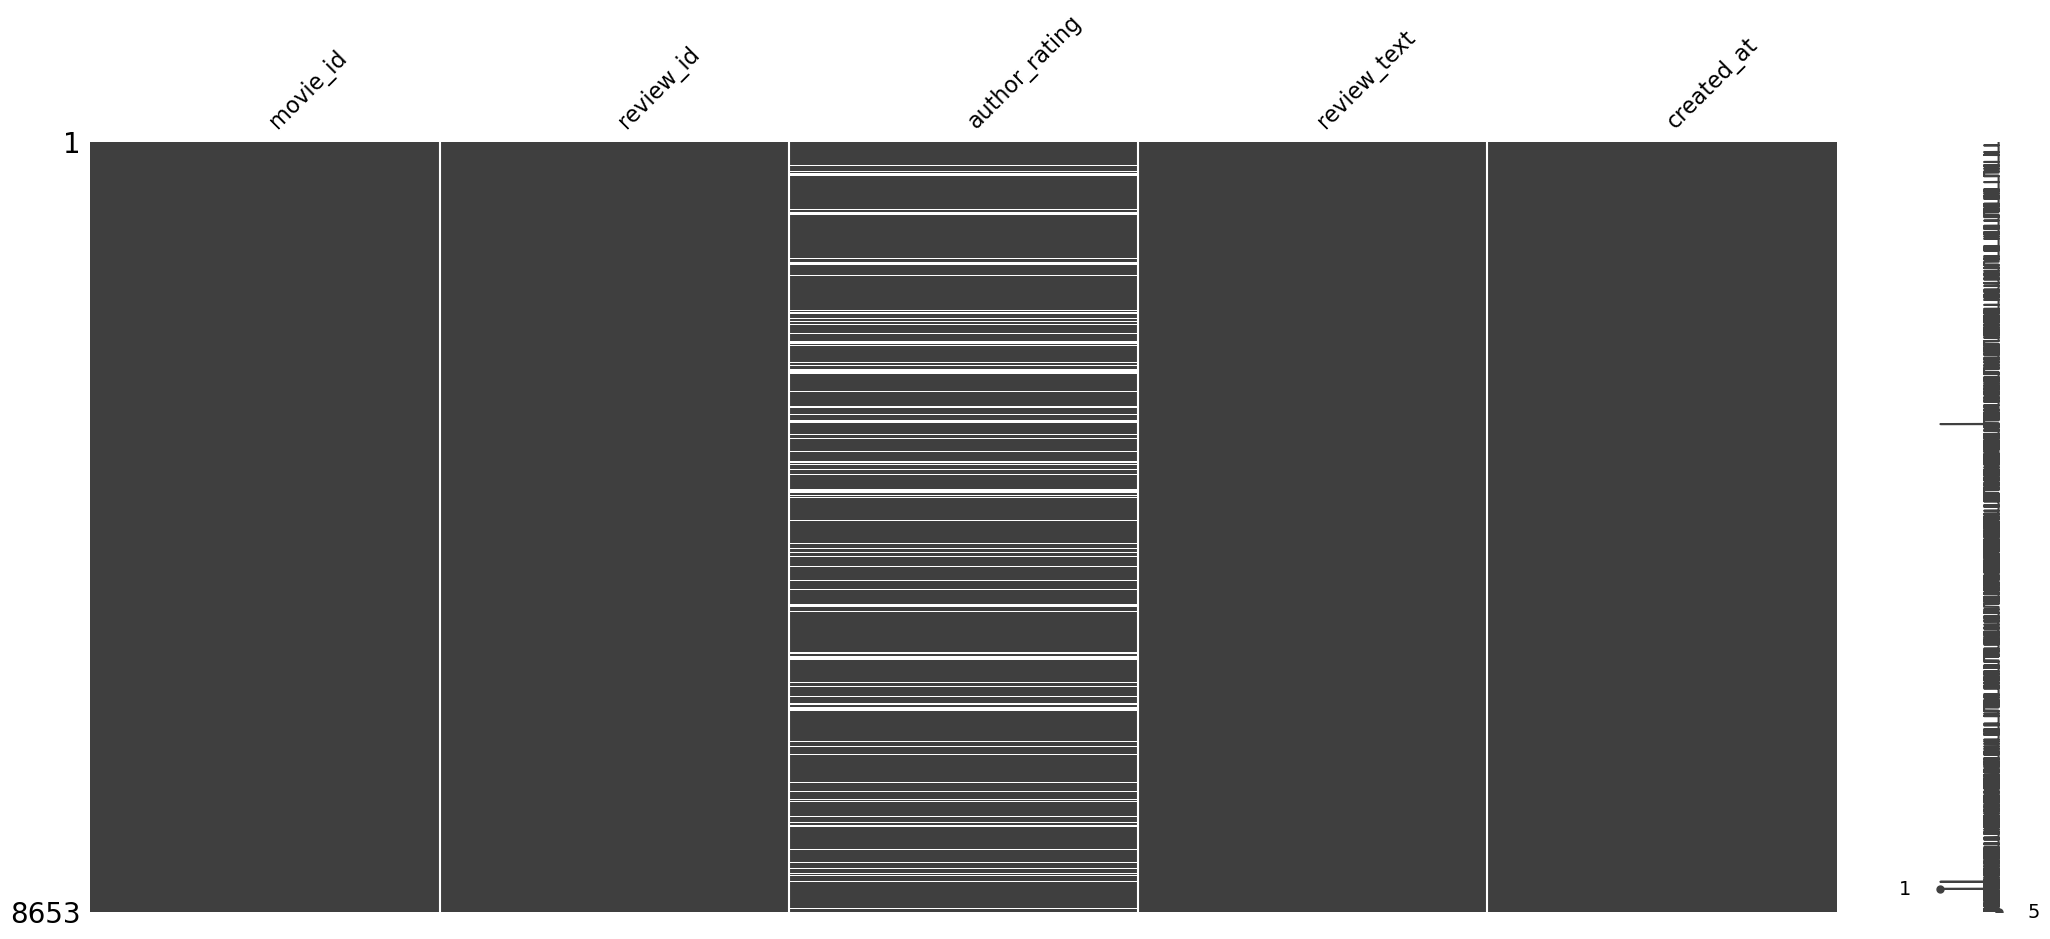

In [93]:
import missingno
missingno.matrix(reviews)

In [94]:
reviews.isna().sum()/len(reviews)

movie_id         0.000000
review_id        0.000347
author_rating    0.138565
review_text      0.000347
created_at       0.000347
dtype: float64

In [98]:
reviews.duplicated('review_id').sum()

3

In [100]:
# reviews

In [103]:
reviews = reviews.dropna(subset=['review_text'])
reviews

,movie_id,review_id,author_rating,review_text,created_at
0,843,64ecc16e83901800af821d50,7.0,This is a fine piece of cinema from Wong Kar-W...,2023-08-28 15:46:55.026000+00:00
0,7443,57086ff5c3a3681d29001512,9.0,"A guilty pleasure for me personally, as I love...",2016-04-09 02:59:01.116000+00:00
1,7443,5bb5ac829251410dcb00810c,6.0,Made my roommate who hates stop-motion animati...,2018-10-04 06:00:34.227000+00:00
2,7443,5f0c53a013a32000357ec505,8.0,A very good stop-motion animation!\r\n\r\n<em>...,2020-07-13 12:29:20.853000+00:00
3,7443,64ecc027594c9400ffe77c91,7.0,"Ok, there is an huge temptation to riddle this...",2023-08-28 15:41:27.525000+00:00
...,...,...,...,...,...
4,575264,64ba5c5706f98400e1169ed0,7.0,"I'm not really a great fan of Tom Cruise. Yes,...",2023-07-21 10:22:15.048000+00:00
5,575264,64bdab4dad50f0013b127c02,6.0,Spectacular cinematic action let down by an in...,2023-07-23 22:35:58.004000+00:00
6,575264,64cca28c43cd5400add62db6,9.0,The Tom Cruise “Mission Impossible” franchise ...,2023-08-04 07:02:36.097000+00:00
7,575264,652e4978caef2d0139df3b6c,8.0,It was a good movie. Not better than the pervi...,2023-10-17 08:44:40.250000+00:00


<Axes: >

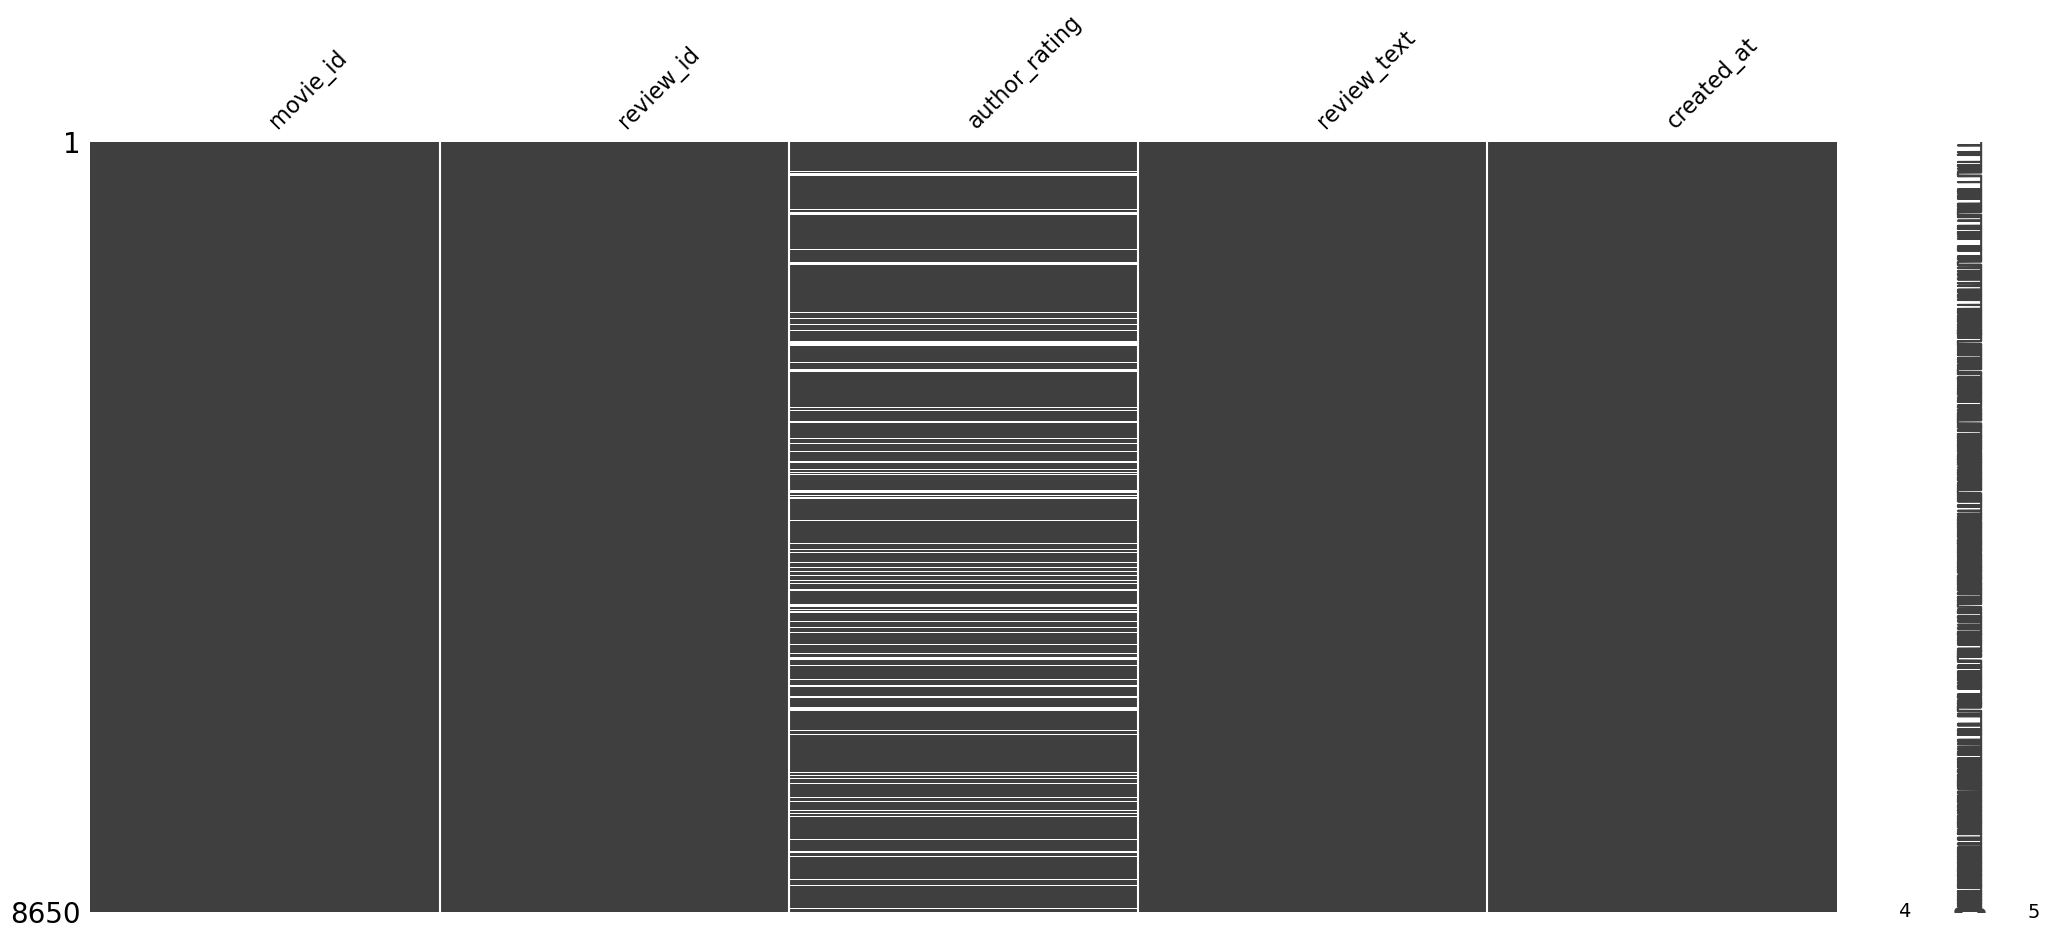

In [104]:
 missingno.matrix(reviews)

In [107]:
reviews = reviews.rename({'author_rating':'rating'},axis=1)
reviews

,movie_id,review_id,rating,review_text,created_at
0,843,64ecc16e83901800af821d50,7.0,This is a fine piece of cinema from Wong Kar-W...,2023-08-28 15:46:55.026000+00:00
0,7443,57086ff5c3a3681d29001512,9.0,"A guilty pleasure for me personally, as I love...",2016-04-09 02:59:01.116000+00:00
1,7443,5bb5ac829251410dcb00810c,6.0,Made my roommate who hates stop-motion animati...,2018-10-04 06:00:34.227000+00:00
2,7443,5f0c53a013a32000357ec505,8.0,A very good stop-motion animation!\r\n\r\n<em>...,2020-07-13 12:29:20.853000+00:00
3,7443,64ecc027594c9400ffe77c91,7.0,"Ok, there is an huge temptation to riddle this...",2023-08-28 15:41:27.525000+00:00
...,...,...,...,...,...
4,575264,64ba5c5706f98400e1169ed0,7.0,"I'm not really a great fan of Tom Cruise. Yes,...",2023-07-21 10:22:15.048000+00:00
5,575264,64bdab4dad50f0013b127c02,6.0,Spectacular cinematic action let down by an in...,2023-07-23 22:35:58.004000+00:00
6,575264,64cca28c43cd5400add62db6,9.0,The Tom Cruise “Mission Impossible” franchise ...,2023-08-04 07:02:36.097000+00:00
7,575264,652e4978caef2d0139df3b6c,8.0,It was a good movie. Not better than the pervi...,2023-10-17 08:44:40.250000+00:00


In [108]:
combined_reviews_fname = FOLDER+"tmdb-movie-reviews.csv.gz"
reviews.to_csv(combined_reviews_fname, index=False, compression='gzip')

In [109]:
combined_reviews_fname

'Data-NLP/tmdb-movie-reviews.csv.gz'